In [50]:
import pandas as pd
import matplotlib.pyplot as plt
df_temp =  pd.read_csv("bcsn_fq_4_10.txt",sep=' ',names=['X_a','Y_a','Z_a','X_ω','Y_ω','Z_ω'])
a1 = df_temp[df_temp['Z_ω']== 1000].index.tolist() #判断Z_ω=1000的次数，a1/2为动作次数
print('bcsn_fq_4_10文件 动作次数是：',len(a1)/2)

bcsn_fq_4_10文件 动作次数是： 110.0


In [51]:
a1

[0,
 133,
 134,
 233,
 234,
 355,
 356,
 493,
 494,
 602,
 603,
 698,
 699,
 826,
 827,
 944,
 945,
 1044,
 1045,
 1169,
 1170,
 1304,
 1305,
 1438,
 1439,
 1563,
 1564,
 1695,
 1696,
 1801,
 1802,
 1891,
 1892,
 2013,
 2014,
 2141,
 2142,
 2280,
 2281,
 2414,
 2415,
 2555,
 2556,
 2646,
 2647,
 2744,
 2745,
 2846,
 2847,
 2965,
 2966,
 3122,
 3123,
 3280,
 3281,
 3386,
 3387,
 3518,
 3519,
 3644,
 3645,
 3779,
 3780,
 3920,
 3921,
 4045,
 4046,
 4196,
 4197,
 4329,
 4330,
 4464,
 4465,
 4611,
 4612,
 4747,
 4748,
 4880,
 4881,
 5017,
 5018,
 5149,
 5150,
 5276,
 5277,
 5419,
 5420,
 5551,
 5552,
 5689,
 5690,
 5830,
 5831,
 5974,
 5975,
 6113,
 6114,
 6260,
 6261,
 6398,
 6399,
 6563,
 6564,
 6714,
 6715,
 6883,
 6884,
 7047,
 7048,
 7186,
 7187,
 7302,
 7303,
 7433,
 7434,
 7574,
 7575,
 7708,
 7709,
 7838,
 7839,
 7985,
 7986,
 8120,
 8121,
 8246,
 8247,
 8372,
 8373,
 8496,
 8497,
 8619,
 8620,
 8748,
 8749,
 8870,
 8871,
 9004,
 9005,
 9138,
 9139,
 9257,
 9258,
 9380,
 9381,
 949

In [52]:
sub_df = {}
df = {}
for i in range(0,int(len(a1)/2)):
    sub_df[i] = df_temp.iloc[a1[i*2]+1:a1[(i*2)+1]] #切割：将每次动作切割出来
    print(i,sub_df[i])
    sub_df[i] = sub_df[i].rolling(window = 5).mean()
    sub_df[i] = sub_df[i].reset_index(drop=True) #重新定义行索引从0开始
    df_max = sub_df[i]['Z_ω'].idxmax() #找到Z_ω最大值点对应的行索引
    df[i] = sub_df[i].loc[df_max-24:df_max+25].reset_index(drop=True).fillna(0)
    #根据Z_ω行索引 提取动作段，前25个数据，后25个数据

0           X_a       Y_a       Z_a        X_ω         Y_ω        Z_ω
1    2.460938 -1.726074 -0.511719 -137.74391  -24.573172 -245.36586
2    1.702637 -1.208008  0.297363 -228.35367  -12.012196 -193.90245
3    1.567871 -2.443848 -0.098145 -188.78049    6.158537 -176.21951
4    1.134766 -2.930664 -0.265137 -182.43903   15.853659 -137.86586
5    0.903809 -3.402832 -0.447754 -122.13415    8.414635  -69.02439
..        ...       ...       ...        ...         ...        ...
128  1.905762 -0.122070 -0.091797  108.29269  107.439026 -130.30489
129  1.489746 -0.168457 -0.241211   82.07317  113.658540 -142.56097
130  1.435547  0.084961 -0.257812   83.17073   97.865850 -145.48781
131  1.117188 -1.439941 -0.519043  168.10976   70.792690 -135.73170
132  0.416504 -0.703613 -1.288574  294.02438   36.463417 -136.76830

[132 rows x 6 columns]
1           X_a       Y_a       Z_a        X_ω        Y_ω        Z_ω
135  1.017578 -0.199707 -0.125488  -0.975610   9.817074   9.939025
136  1.011719 -0.22753

22            X_a       Y_a       Z_a         X_ω        Y_ω         Z_ω
2648  1.171875  0.324219  0.064453 -178.048780   2.804878   16.463415
2649  1.152344  0.149902  0.182617 -219.329270  12.134147  -24.024391
2650  1.128418  0.172363 -0.018066 -205.121960  25.304878  -69.085365
2651  1.104492  0.019531 -0.187012 -151.646350  23.048780 -107.865850
2652  1.087891 -0.115723 -0.185059 -104.268295  12.378049 -129.512190
...        ...       ...       ...         ...        ...         ...
2739  1.396484 -0.008301  0.317871   89.207320 -14.085366   53.170734
2740  1.090820  0.249512  0.453613   82.560974   0.060976  -21.524391
2741  0.965820 -0.016602  0.004395   13.719513 -17.804878  -36.585365
2742  0.845215  0.188477 -0.113281  -21.341463 -21.646341  -19.146341
2743  0.970215  0.324219  0.048828   27.439026 -15.060976   16.707317

[96 rows x 6 columns]
23            X_a       Y_a       Z_a        X_ω        Y_ω        Z_ω
2746  1.034668 -0.440918  0.181641 -14.207317   1.219512   7.37

44            X_a       Y_a       Z_a        X_ω        Y_ω        Z_ω
5553  1.040039 -0.183105  0.030273  -0.365854   9.512196  -1.585366
5554  1.038574 -0.190918  0.034180   0.792683   9.390245  -1.402439
5555  1.050293 -0.178223  0.032227  -1.951220   9.878049  -0.548781
5556  1.038086 -0.179688  0.033203  -6.402439  10.426829   0.670732
5557  1.044922 -0.130371  0.062988 -10.426829  10.304878   3.475610
...        ...       ...       ...        ...        ...        ...
5684  1.079590 -0.072754  0.052246   2.621951  34.817074  13.475610
5685  1.069824 -0.072754  0.071289  11.768293  32.865856  29.268293
5686  1.060547 -0.040527  0.148438  14.451220  31.890245  43.658540
5687  1.052246 -0.078613  0.107910   7.378049  34.451220  53.048782
5688  1.088379 -0.087402  0.077637  -9.329268  35.853660  55.000000

[136 rows x 6 columns]
45            X_a       Y_a       Z_a         X_ω        Y_ω         Z_ω
5691  1.023438 -0.191406  0.111328  -10.243902  -1.768293   19.207317
5692  1.037109

68            X_a       Y_a       Z_a       X_ω        Y_ω        Z_ω
8872  1.006836 -0.118164  0.031250 -3.231707   6.890244   7.560976
8873  1.014648 -0.130371  0.032227 -4.085366   6.829268   7.317073
8874  1.022949 -0.133301  0.031738 -4.817073   6.707317   6.280488
8875  1.031250 -0.140625  0.045898 -4.329268   6.402439   4.756098
8876  1.041016 -0.144043  0.039062 -3.963415   6.158537   2.865854
...        ...       ...       ...       ...        ...        ...
8999  1.054199 -0.218262  0.033203  8.719512  33.841465 -15.243903
9000  1.034668 -0.164551  0.065918  7.621952  35.731710 -16.463415
9001  1.037109 -0.119629  0.083496  2.500000  36.219513 -13.231708
9002  1.054688 -0.048340  0.104492 -1.829268  36.219513  -3.780488
9003  1.083984 -0.036133  0.119629 -6.585366  37.682926  11.707317

[132 rows x 6 columns]
69            X_a       Y_a       Z_a         X_ω        Y_ω         Z_ω
9006  1.028320 -0.148926  0.059082   20.975610  -2.621951   28.597560
9007  1.083984 -0.117676  

98             X_a       Y_a       Z_a         X_ω        Y_ω        Z_ω
12695  1.092773 -0.090820  0.077637  -78.109760  17.256098 -76.341470
12696  1.059570 -0.124512  0.083496  -38.536587  13.292684 -85.731710
12697  1.052734 -0.068848  0.127930   -3.902439   7.560976 -91.707320
12698  1.036621 -0.029785  0.102051   12.317074   4.878049 -93.963420
12699  0.989258 -0.049805  0.041504    2.987805   5.975610 -92.317080
...         ...       ...       ...         ...        ...        ...
12807  1.097168  0.047363  0.051270  -31.768293  21.524391  69.512200
12808  1.033203 -0.005859 -0.048340  -53.536587  25.975610  75.243904
12809  1.163574 -0.002441  0.092773  -65.670730  25.853659  72.865850
12810  1.126953  0.371582  0.079590  -89.268295  22.560976  65.182930
12811  1.000488  0.314941  0.063965 -132.317080  20.182928  47.439026

[117 rows x 6 columns]
99             X_a       Y_a       Z_a        X_ω        Y_ω        Z_ω
12814  1.010742 -0.107910  0.127930 -17.987804  -5.914634  19

In [53]:
for i in df:
    print(i,len(df[i]))

0 50
1 50
2 50
3 50
4 50
5 50
6 50
7 50
8 50
9 50
10 50
11 50
12 50
13 50
14 50
15 48
16 50
17 50
18 50
19 50
20 50
21 50
22 50
23 50
24 50
25 50
26 50
27 50
28 50
29 50
30 50
31 50
32 50
33 50
34 50
35 50
36 50
37 50
38 50
39 50
40 50
41 50
42 50
43 50
44 50
45 50
46 50
47 50
48 50
49 50
50 50
51 50
52 50
53 50
54 50
55 50
56 50
57 50
58 50
59 50
60 50
61 50
62 50
63 50
64 50
65 50
66 50
67 50
68 50
69 50
70 50
71 50
72 50
73 50
74 50
75 50
76 50
77 50
78 50
79 50
80 50
81 50
82 50
83 50
84 50
85 50
86 50
87 50
88 50
89 50
90 50
91 50
92 50
93 50
94 50
95 50
96 50
97 50
98 50
99 50
100 50
101 50
102 50
103 50
104 50
105 50
106 50
107 50
108 50
109 50


In [54]:
df[68]

X_a       Y_a       Z_a         X_ω         Y_ω          Z_ω
0   1.339648  0.137109  0.065430  -26.402439   -4.548780    43.158538
1   1.423242  0.144043  0.193848  -34.341463    4.536586    34.402440
2   1.501465  0.063867  0.340918  -38.743902    8.658537    26.487806
3   1.490332 -0.006055  0.520801  -33.426829    9.390245    20.097562
4   1.557324 -0.213867  0.759082  -31.768293   11.304879     7.914635
5   1.736426 -0.465039  0.958496  -24.146342   19.000001   -18.987805
6   2.040234 -0.162988  0.841797   25.170730   36.621953   -68.573172
7   2.377930  0.533398  0.552637  117.987803   57.817075  -148.829269
8   2.723633  1.014648  0.216016  189.890246   79.487807  -251.268296
9   2.914941  1.425000 -0.246387  220.256101  100.036588  -351.646348
10  2.930371  1.650488 -0.645996  225.231711  116.207321  -437.926842
11  2.740234  1.200098 -0.793164  196.390249  127.878054  -498.060990
12  2.558691  0.341016 -0.760449  128.121957  134.256102  -519.902456
13  2.338281 -0.430176 -0.740430   58.036587  142.121954  -509.304892
14  2.110352 -0.984180 -0.613770   30.560977  153.524392  -474.365866
15  1.913477 -1.804492 -0.391992   24.841464  165.109756  -403.719520
16  1.796094 -2.600586 -0.187207   -7.524392  178.170730  -277.170736
17  1.830176 -3.301074 -0.051367  -73.707322  199.280486   -92.682926
18  2.330371 -3.619141  0.020605 -105.865860  213.048782   136.743906
19  3.154394 -3.724023 -0.043066 -112.060982  213.780490   384.073178
20  4.278906 -3.310937 -0.294238 -124.475617  200.524392   622.353672
21  5.795703 -2.589258 -0.408594 -111.548786  168.451221   817.890268
22  7.807910 -1.545508 -0.591895  -52.341466  125.707319   960.219538
23  9.648535 -0.574512 -0.516797  -15.902440   88.548780  1052.768306
24  9.379102  0.732324 -1.023828  -33.878052   58.500000  1078.024410
25  8.123828  2.578906 -0.776758  -51.646345   35.573172  1027.268310
26  6.533301  2.885254 -0.652539  -45.341467   15.097561   858.109764
27  4.197265  3.205957 -0.503516  -62.939028    3.609757   615.231710
28  1.690820  3.403711 -0.669336  -47.695124  -12.829269   339.195132
29  1.021582  3.095605 -0.082910   28.768296  -34.268294    85.609756
30  1.087500  1.792871 -0.184375   60.926833  -50.573172  -109.487806
31  0.971387  1.681641 -0.140820   43.451224  -54.207319  -200.000004
32  0.843359  1.354004 -0.059961   68.914639  -60.573172  -235.682934
33  0.695312  1.048047  0.077832   80.024393  -63.353660  -246.475616
34  0.578223  0.599219  0.095215   44.646342  -61.487807  -247.548784
35  0.438477  0.534863  0.150195   46.060976  -60.219515  -254.487810
36  0.407227  0.566016  0.148535   68.878049  -61.865855  -262.219518
37  0.459473  0.484277  0.180859   56.512195  -63.487806  -260.682932
38  0.551758  0.333301  0.214648   32.780489  -62.195124  -254.634152
39  0.670410  0.247168  0.243457   30.756099  -59.170732  -247.597568
40  0.789844  0.191504  0.249805   38.853660  -56.219512  -237.707324
41  0.897363  0.146191  0.226562   43.719514  -53.512196  -223.512200
42  0.969141  0.051367  0.192480   48.573173  -51.512196  -203.902442
43  0.986328 -0.068164  0.153711   55.500001  -50.329270  -178.182929
44  0.980469  0.255469  0.167383   63.548781  -50.487807  -146.804881
45  1.210547  0.938379  0.097656   52.390244  -50.134148  -106.353660
46  1.690723  0.054102 -0.228125    8.926828  -43.195124   -63.780490
47  1.976465 -0.765234  0.181641  -49.865859  -30.719514   -26.524392
48  2.348242 -1.267774 -0.200000  -79.195127  -19.658537    20.085366
49  2.595801 -1.794629 -0.353320  -91.304883  -13.768293    56.804880

In [55]:
#自动补全
for i in df:
    if(len(df[i]) < 50):
        for j in range(df[i].index.size,50):
            df[i].loc[j] = df[i-1].loc[j]

In [56]:
#自动补全检测
for i in df:
    print(i,len(df[i]))

0 50
1 50
2 50
3 50
4 50
5 50
6 50
7 50
8 50
9 50
10 50
11 50
12 50
13 50
14 50
15 50
16 50
17 50
18 50
19 50
20 50
21 50
22 50
23 50
24 50
25 50
26 50
27 50
28 50
29 50
30 50
31 50
32 50
33 50
34 50
35 50
36 50
37 50
38 50
39 50
40 50
41 50
42 50
43 50
44 50
45 50
46 50
47 50
48 50
49 50
50 50
51 50
52 50
53 50
54 50
55 50
56 50
57 50
58 50
59 50
60 50
61 50
62 50
63 50
64 50
65 50
66 50
67 50
68 50
69 50
70 50
71 50
72 50
73 50
74 50
75 50
76 50
77 50
78 50
79 50
80 50
81 50
82 50
83 50
84 50
85 50
86 50
87 50
88 50
89 50
90 50
91 50
92 50
93 50
94 50
95 50
96 50
97 50
98 50
99 50
100 50
101 50
102 50
103 50
104 50
105 50
106 50
107 50
108 50
109 50


In [57]:
#零值替换
for i in df:
    for j in range(len(df[i])):
        if df[i].loc[j,'X_a'] == 0 and df[i].loc[j,'Y_a'] == 0 and df[i].loc[j,'Z_a'] == 0 and df[i].loc[j,'X_ω'] == 0 and df[i].loc[j,'Y_ω'] == 0 and df[i].loc[j,'Z_ω'] == 0:
            df[i].loc[j] = df[i-1].loc[j]

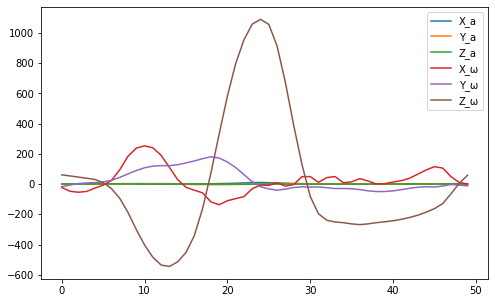

<Figure size 432x288 with 0 Axes>

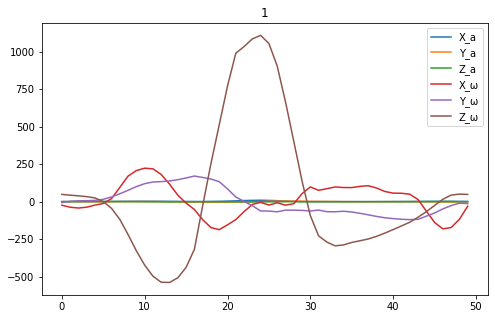

<Figure size 432x288 with 0 Axes>

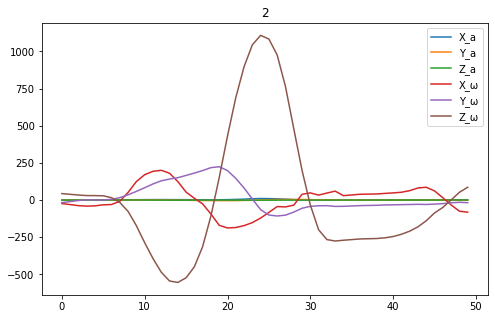

<Figure size 432x288 with 0 Axes>

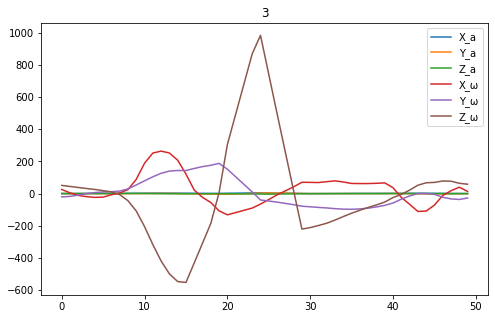

<Figure size 432x288 with 0 Axes>

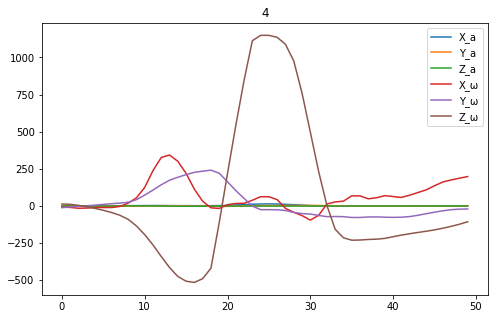

<Figure size 432x288 with 0 Axes>

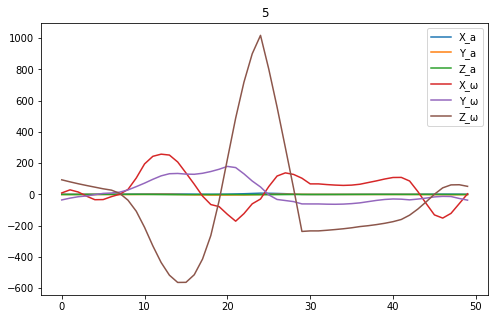

<Figure size 432x288 with 0 Axes>

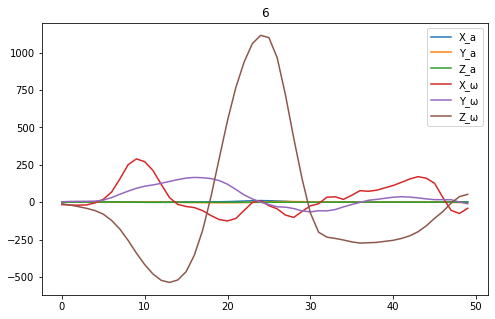

<Figure size 432x288 with 0 Axes>

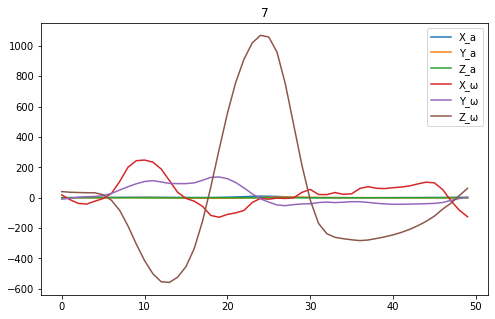

<Figure size 432x288 with 0 Axes>

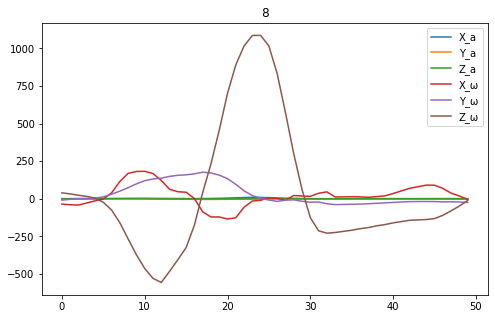

<Figure size 432x288 with 0 Axes>

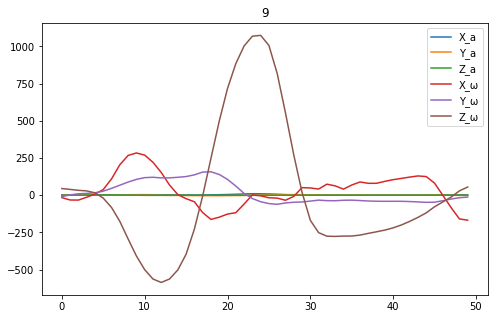

<Figure size 432x288 with 0 Axes>

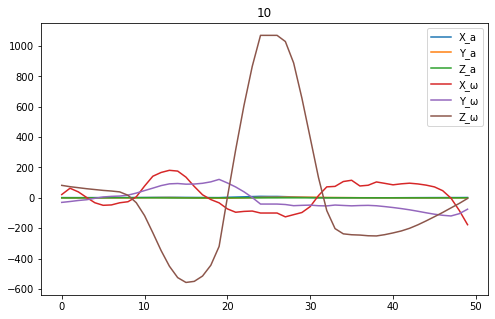

<Figure size 432x288 with 0 Axes>

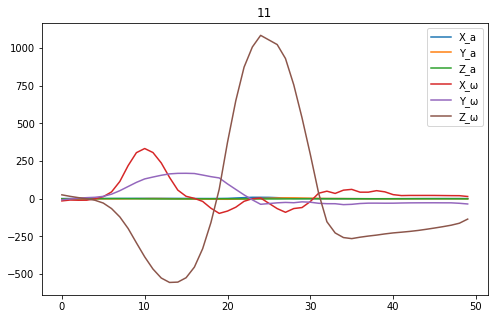

<Figure size 432x288 with 0 Axes>

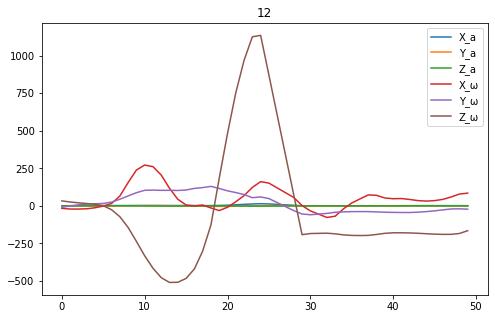

<Figure size 432x288 with 0 Axes>

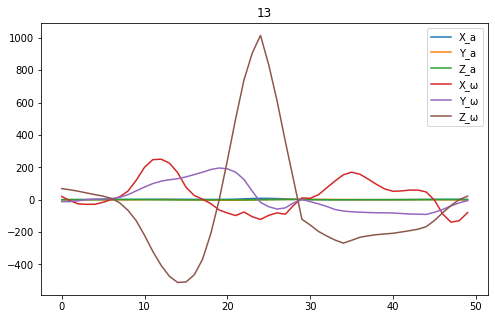

<Figure size 432x288 with 0 Axes>

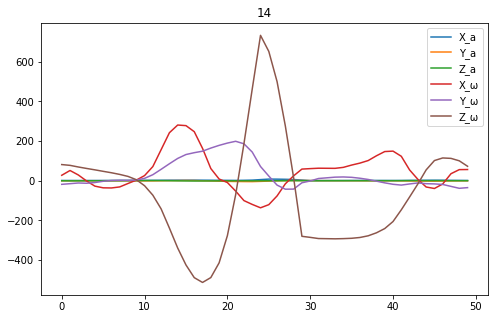

<Figure size 432x288 with 0 Axes>

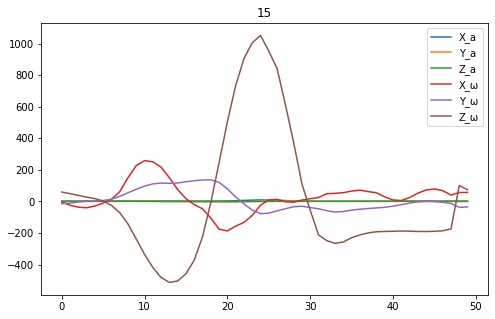

<Figure size 432x288 with 0 Axes>

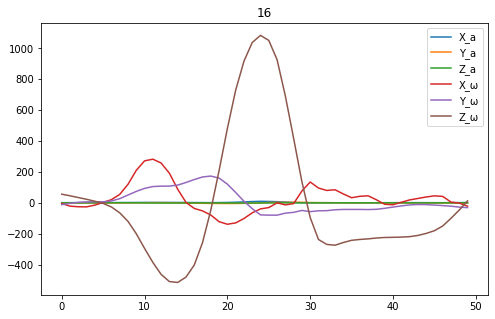

<Figure size 432x288 with 0 Axes>

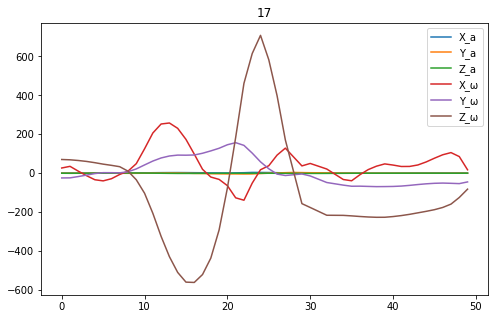

<Figure size 432x288 with 0 Axes>

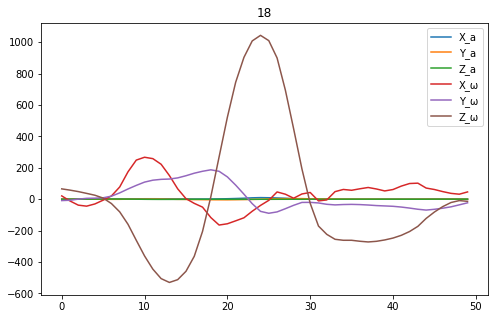

<Figure size 432x288 with 0 Axes>

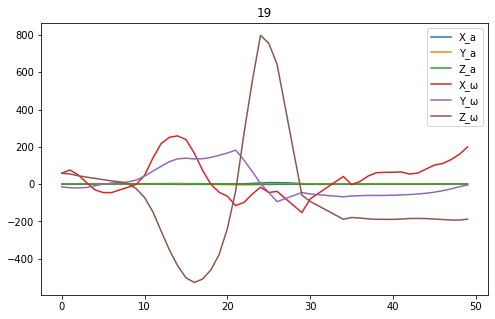

<Figure size 432x288 with 0 Axes>

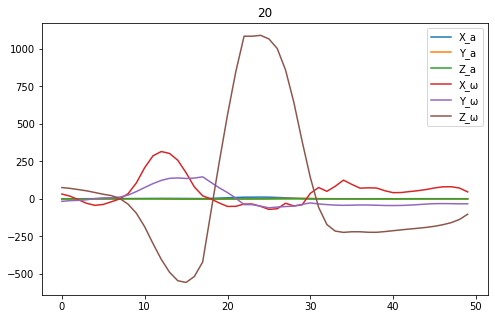

<Figure size 432x288 with 0 Axes>

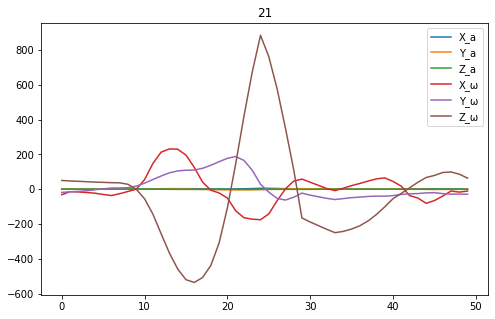

<Figure size 432x288 with 0 Axes>

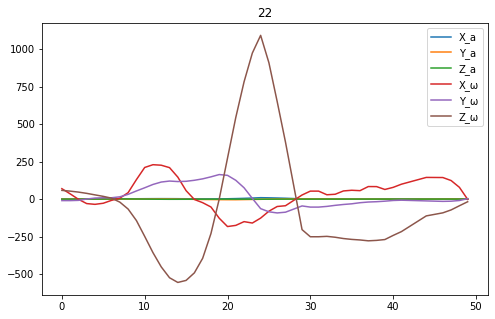

<Figure size 432x288 with 0 Axes>

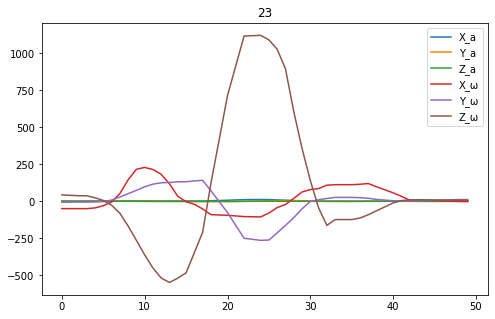

<Figure size 432x288 with 0 Axes>

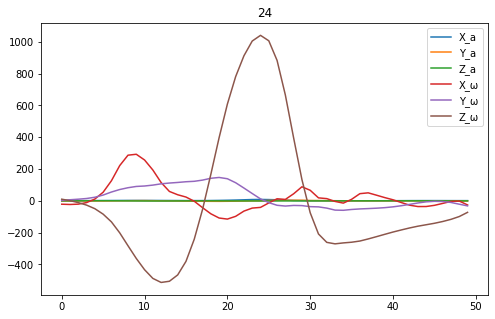

<Figure size 432x288 with 0 Axes>

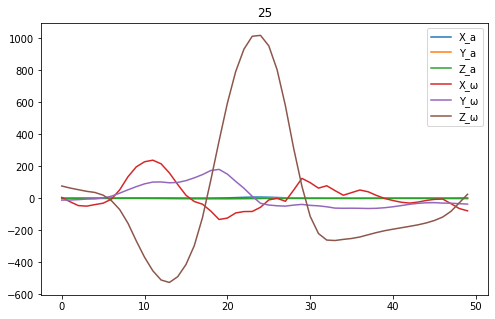

<Figure size 432x288 with 0 Axes>

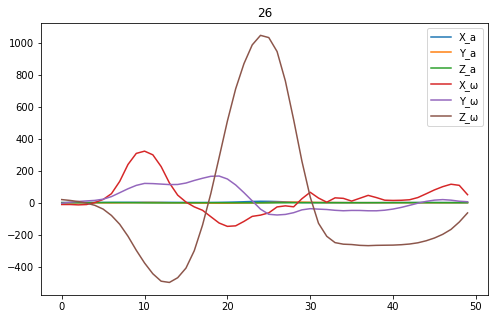

<Figure size 432x288 with 0 Axes>

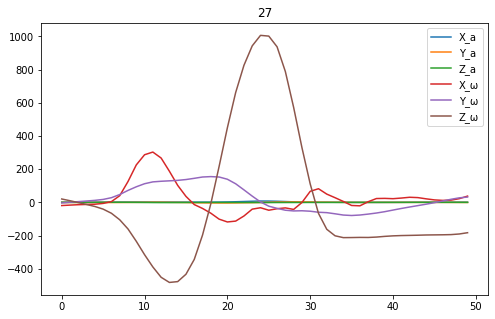

<Figure size 432x288 with 0 Axes>

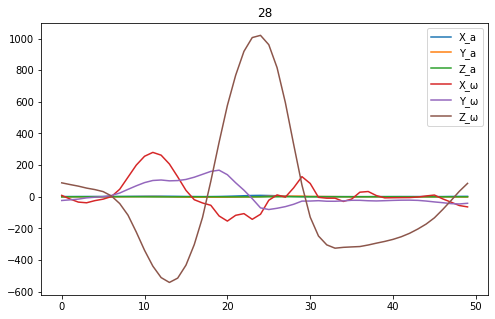

<Figure size 432x288 with 0 Axes>

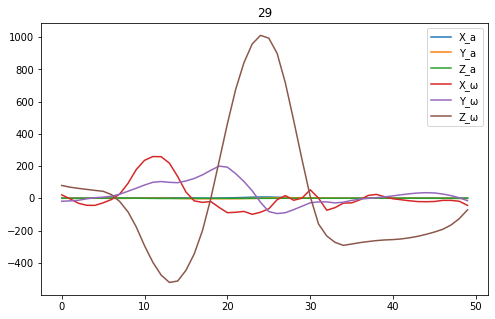

<Figure size 432x288 with 0 Axes>

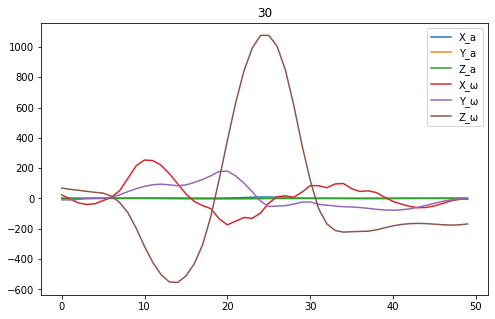

<Figure size 432x288 with 0 Axes>

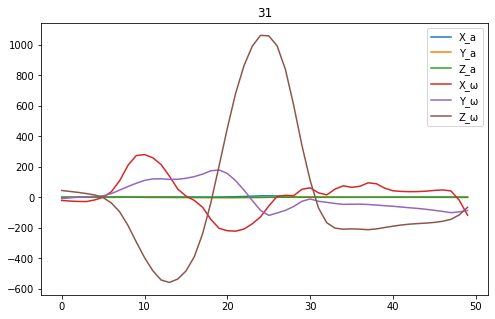

<Figure size 432x288 with 0 Axes>

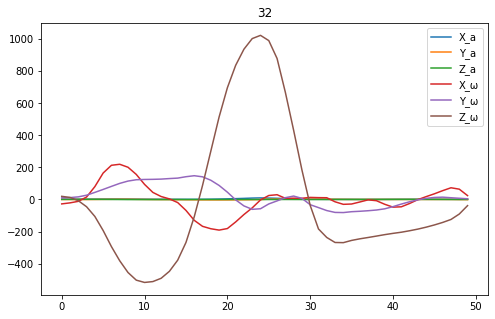

<Figure size 432x288 with 0 Axes>

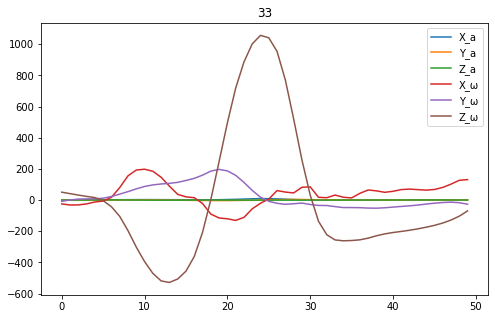

<Figure size 432x288 with 0 Axes>

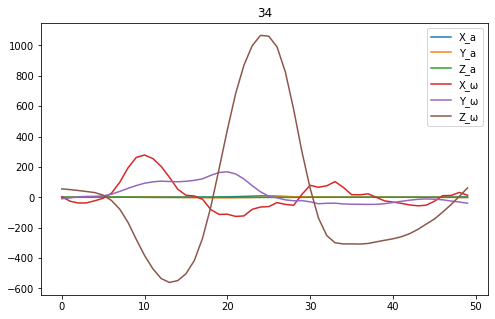

<Figure size 432x288 with 0 Axes>

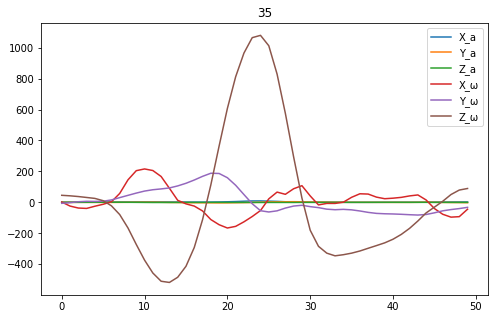

<Figure size 432x288 with 0 Axes>

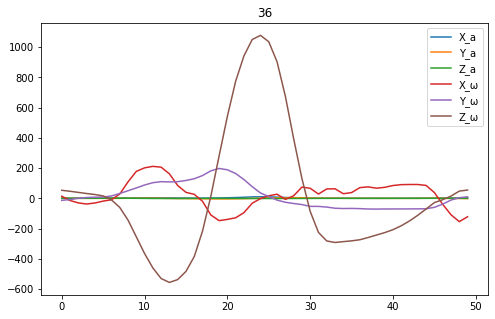

<Figure size 432x288 with 0 Axes>

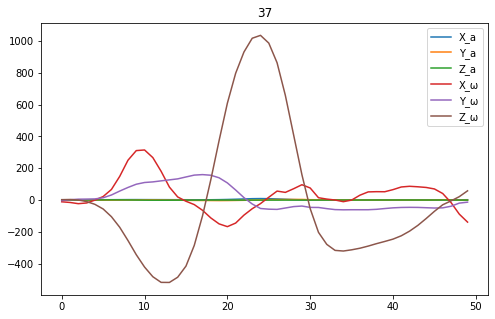

<Figure size 432x288 with 0 Axes>

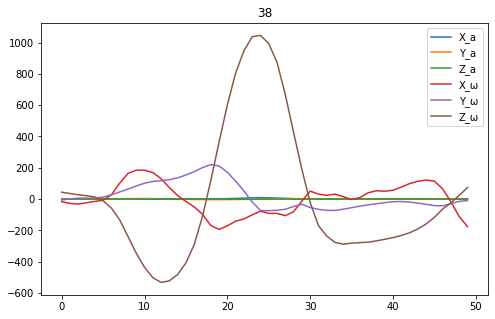

<Figure size 432x288 with 0 Axes>

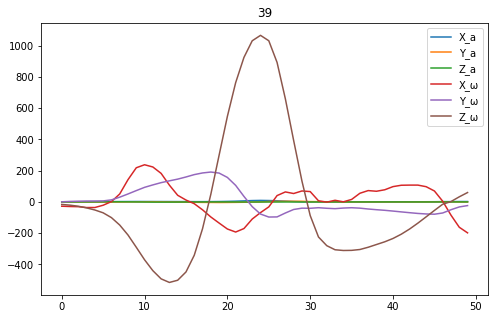

<Figure size 432x288 with 0 Axes>

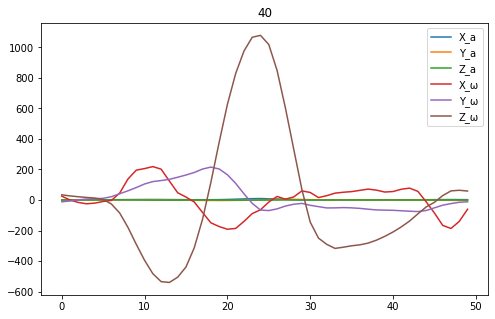

<Figure size 432x288 with 0 Axes>

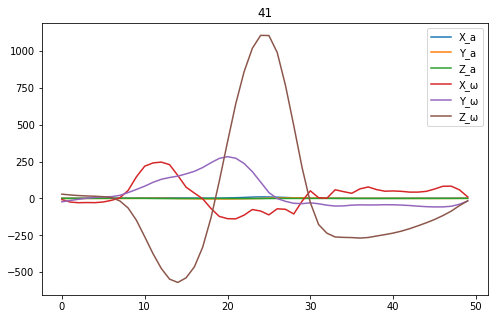

<Figure size 432x288 with 0 Axes>

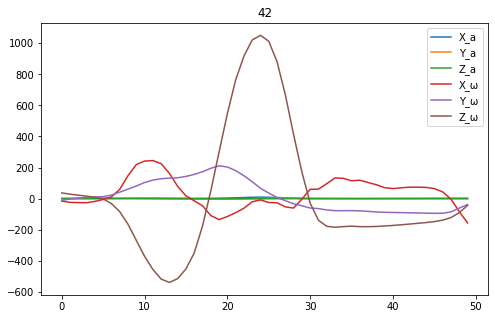

<Figure size 432x288 with 0 Axes>

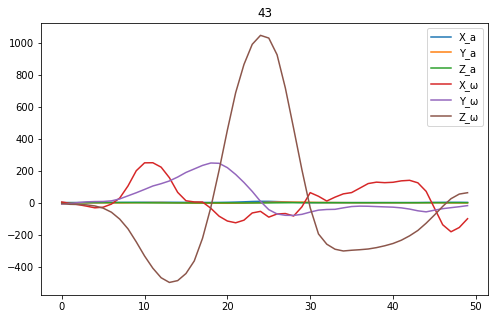

<Figure size 432x288 with 0 Axes>

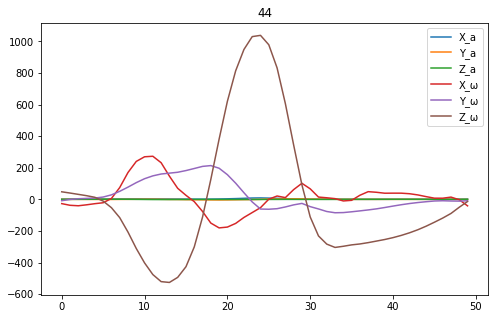

<Figure size 432x288 with 0 Axes>

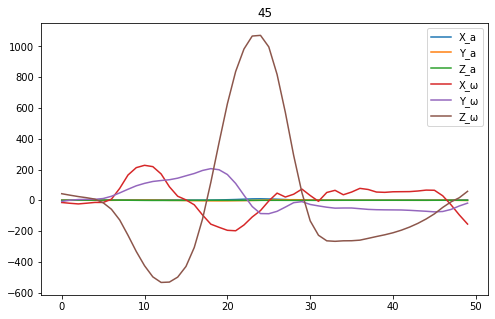

<Figure size 432x288 with 0 Axes>

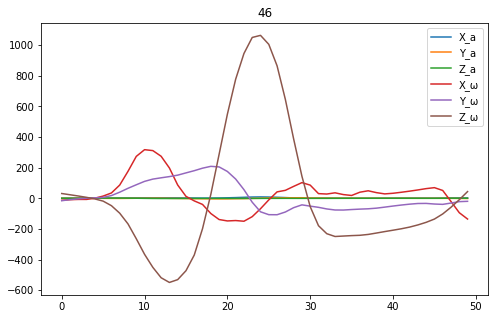

<Figure size 432x288 with 0 Axes>

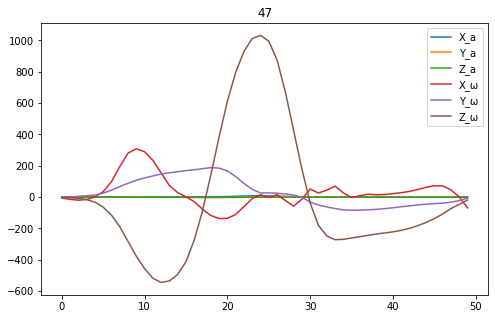

<Figure size 432x288 with 0 Axes>

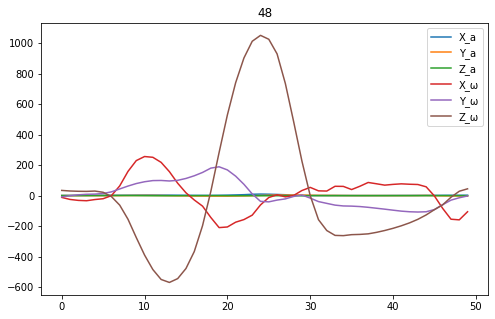

<Figure size 432x288 with 0 Axes>

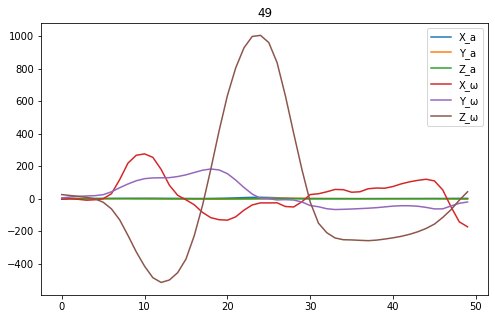

<Figure size 432x288 with 0 Axes>

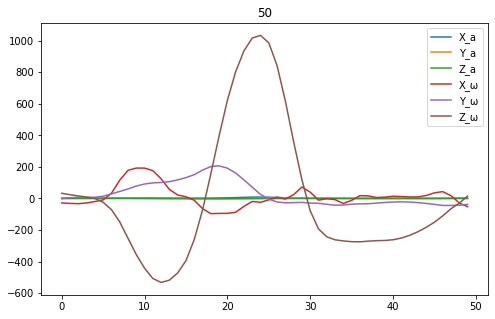

<Figure size 432x288 with 0 Axes>

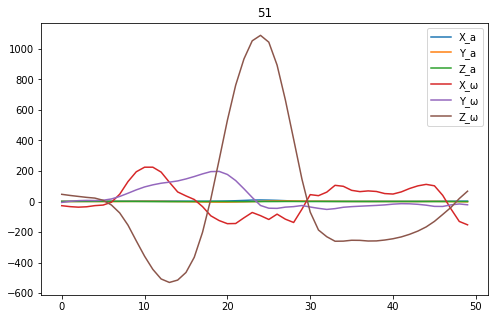

<Figure size 432x288 with 0 Axes>

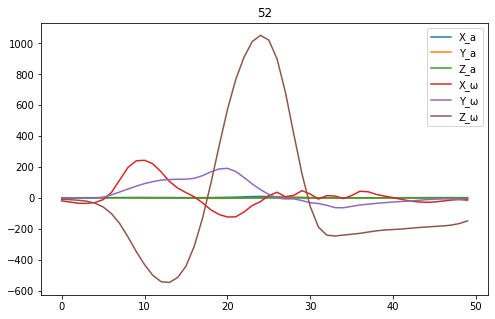

<Figure size 432x288 with 0 Axes>

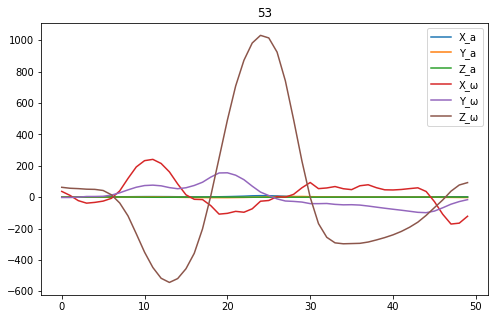

<Figure size 432x288 with 0 Axes>

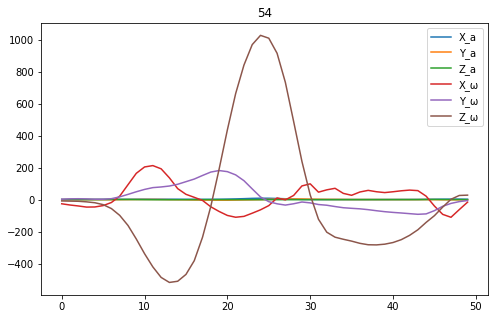

<Figure size 432x288 with 0 Axes>

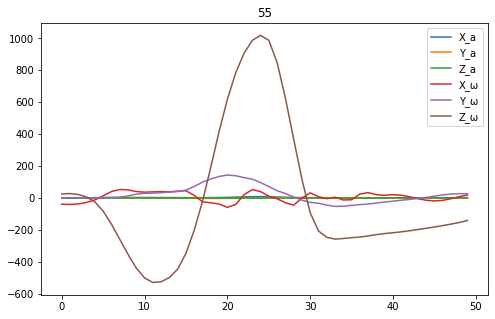

<Figure size 432x288 with 0 Axes>

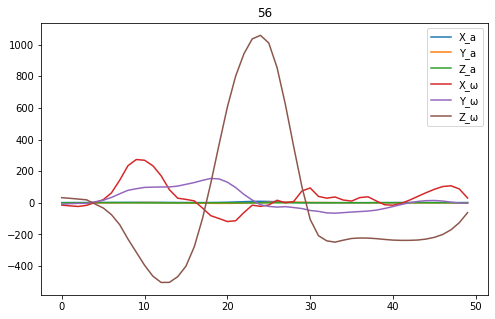

<Figure size 432x288 with 0 Axes>

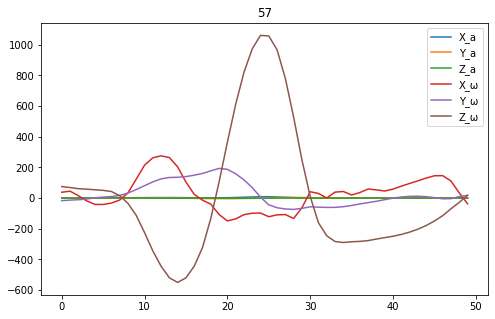

<Figure size 432x288 with 0 Axes>

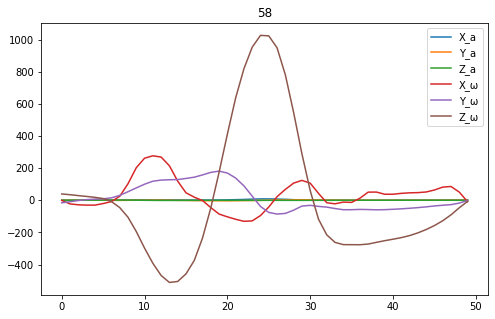

<Figure size 432x288 with 0 Axes>

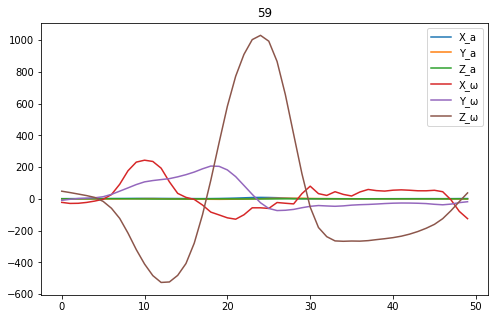

<Figure size 432x288 with 0 Axes>

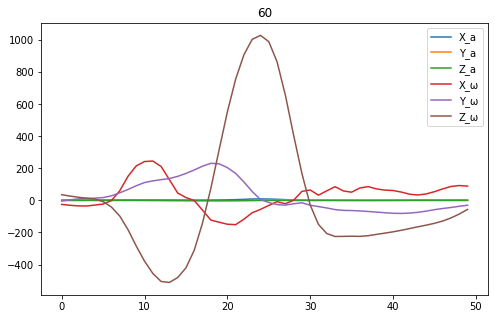

<Figure size 432x288 with 0 Axes>

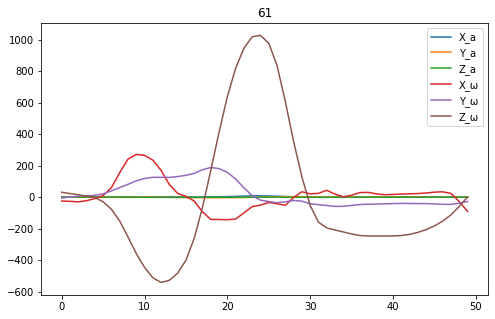

<Figure size 432x288 with 0 Axes>

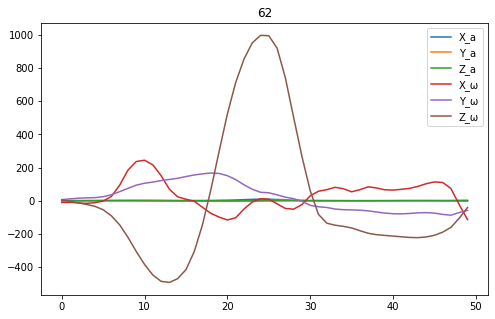

<Figure size 432x288 with 0 Axes>

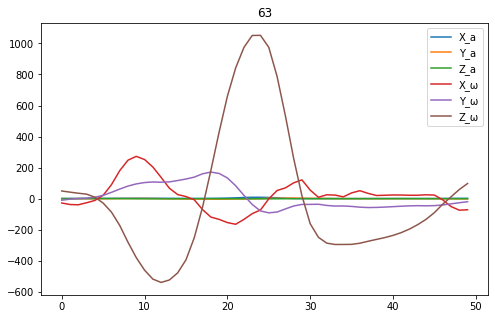

<Figure size 432x288 with 0 Axes>

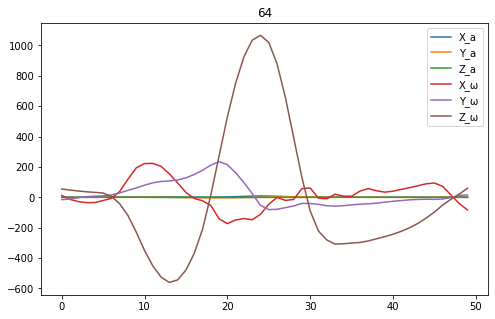

<Figure size 432x288 with 0 Axes>

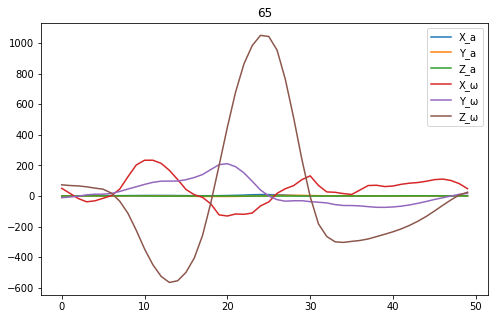

<Figure size 432x288 with 0 Axes>

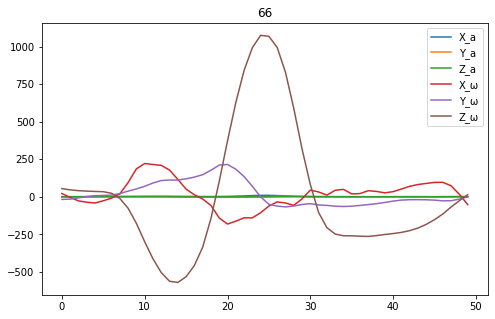

<Figure size 432x288 with 0 Axes>

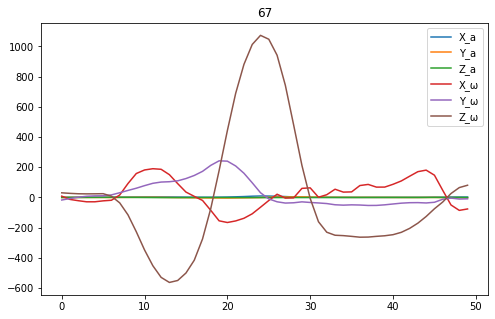

<Figure size 432x288 with 0 Axes>

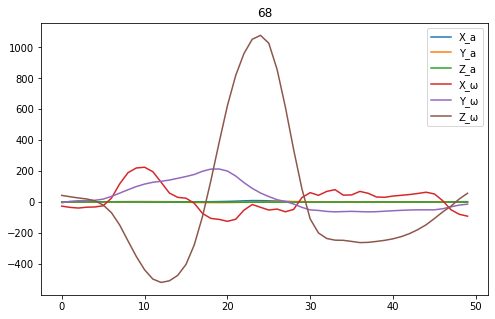

<Figure size 432x288 with 0 Axes>

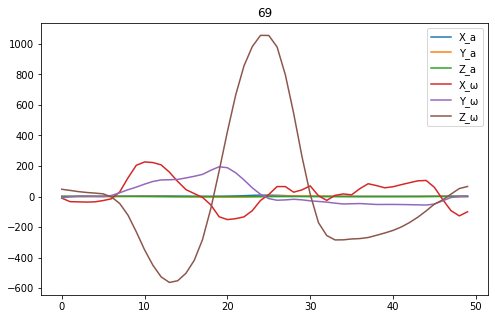

<Figure size 432x288 with 0 Axes>

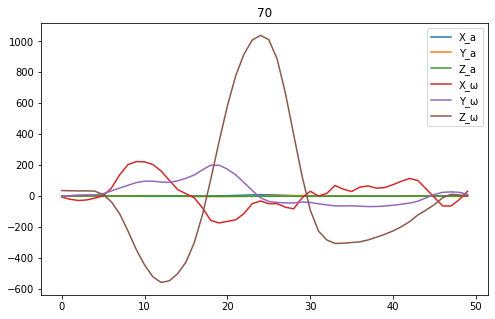

<Figure size 432x288 with 0 Axes>

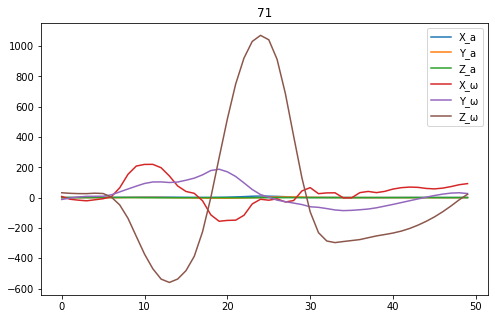

<Figure size 432x288 with 0 Axes>

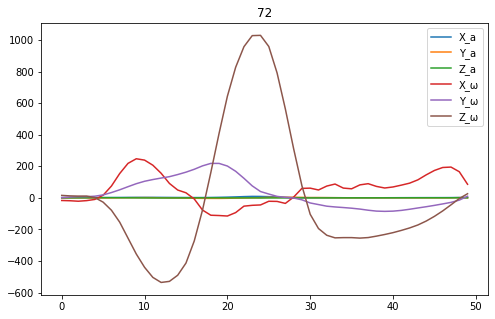

<Figure size 432x288 with 0 Axes>

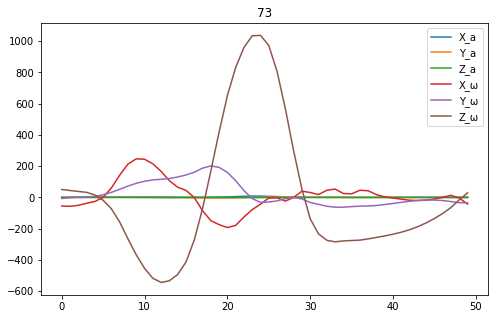

<Figure size 432x288 with 0 Axes>

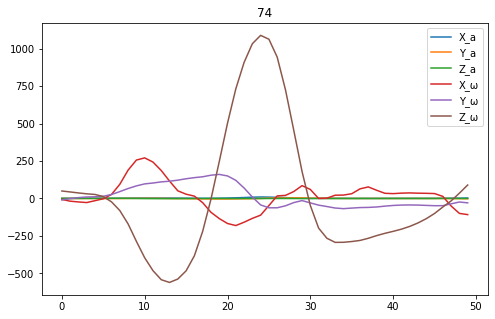

<Figure size 432x288 with 0 Axes>

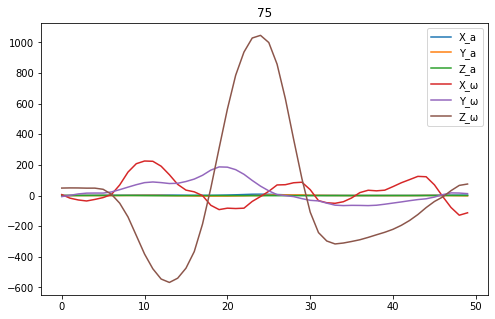

<Figure size 432x288 with 0 Axes>

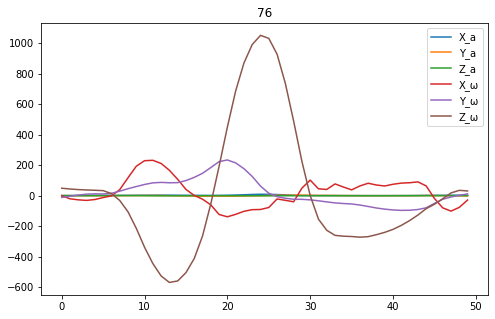

<Figure size 432x288 with 0 Axes>

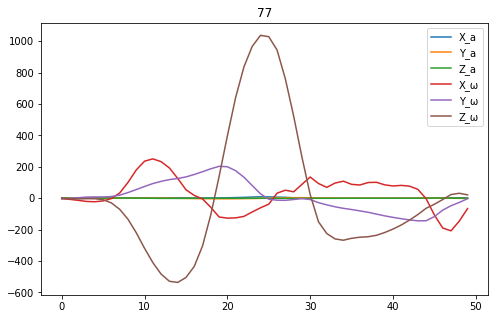

<Figure size 432x288 with 0 Axes>

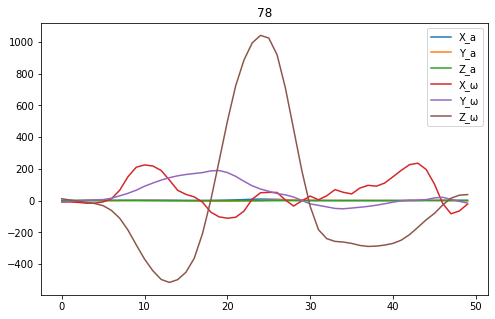

<Figure size 432x288 with 0 Axes>

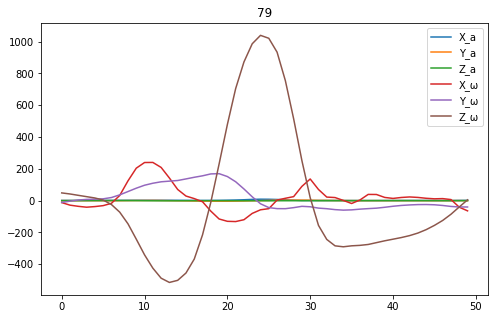

<Figure size 432x288 with 0 Axes>

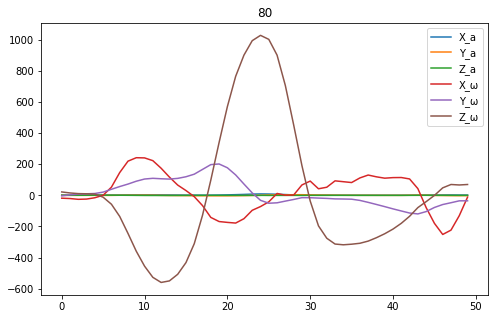

<Figure size 432x288 with 0 Axes>

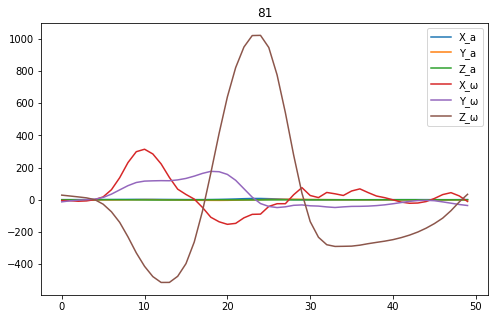

<Figure size 432x288 with 0 Axes>

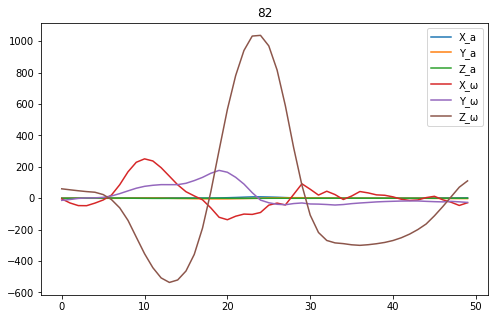

<Figure size 432x288 with 0 Axes>

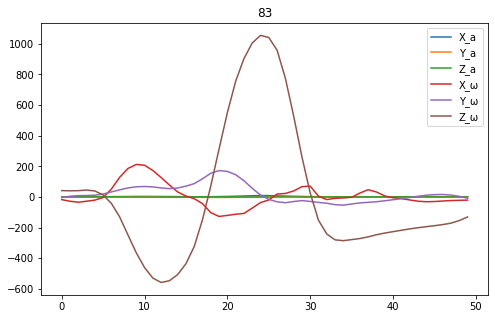

<Figure size 432x288 with 0 Axes>

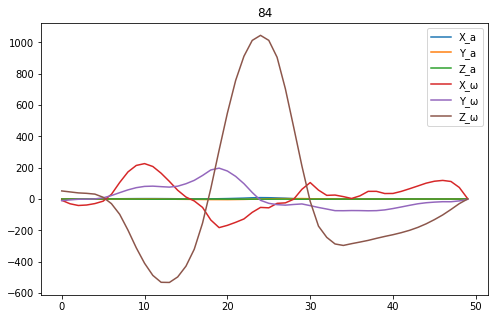

<Figure size 432x288 with 0 Axes>

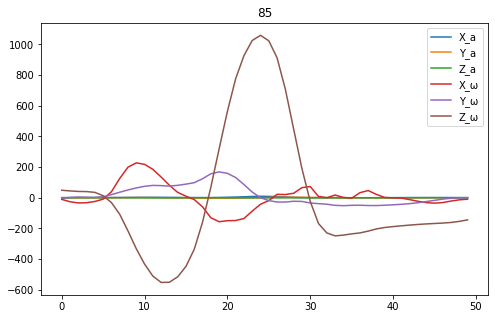

<Figure size 432x288 with 0 Axes>

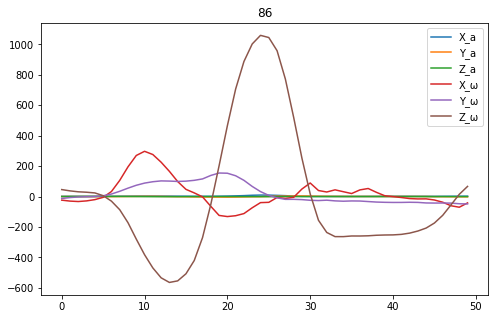

<Figure size 432x288 with 0 Axes>

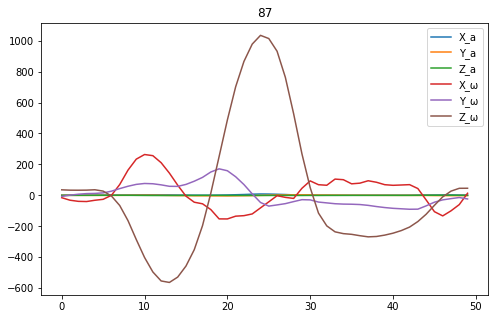

<Figure size 432x288 with 0 Axes>

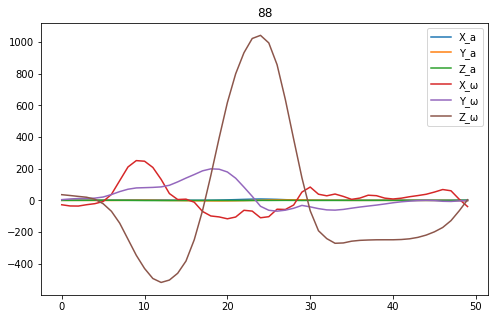

<Figure size 432x288 with 0 Axes>

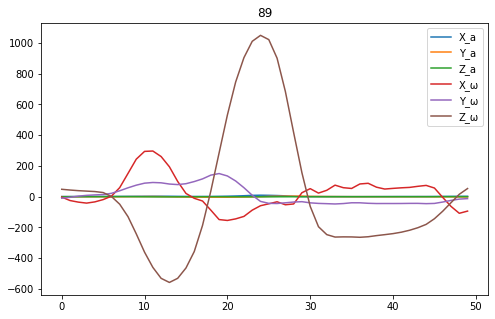

<Figure size 432x288 with 0 Axes>

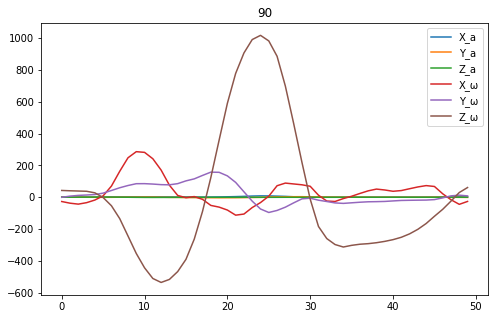

<Figure size 432x288 with 0 Axes>

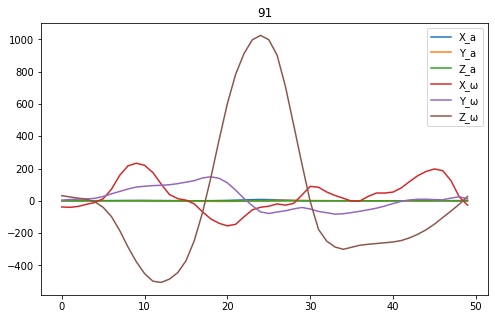

<Figure size 432x288 with 0 Axes>

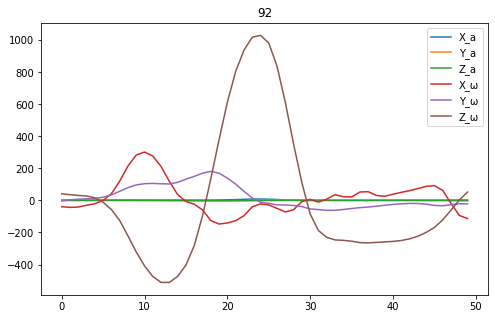

<Figure size 432x288 with 0 Axes>

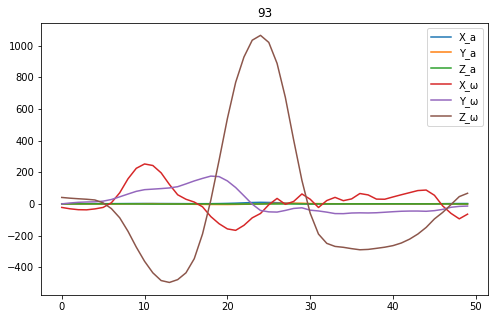

<Figure size 432x288 with 0 Axes>

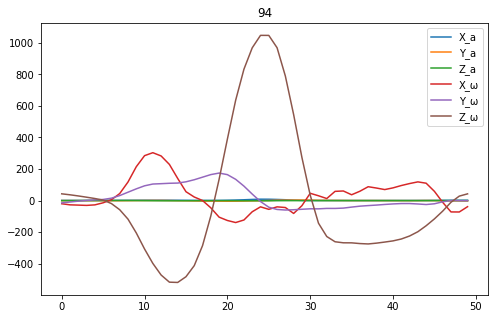

<Figure size 432x288 with 0 Axes>

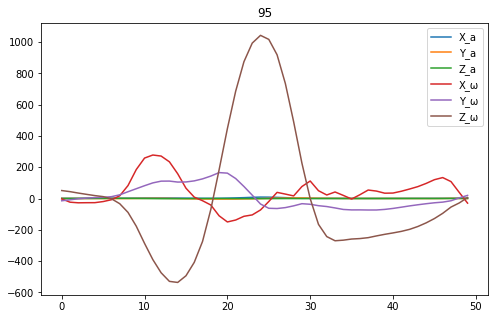

<Figure size 432x288 with 0 Axes>

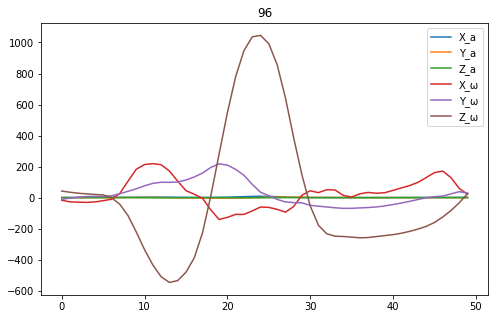

<Figure size 432x288 with 0 Axes>

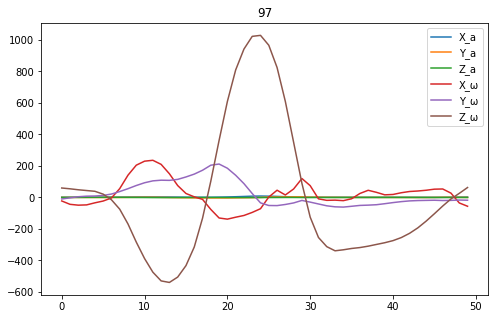

<Figure size 432x288 with 0 Axes>

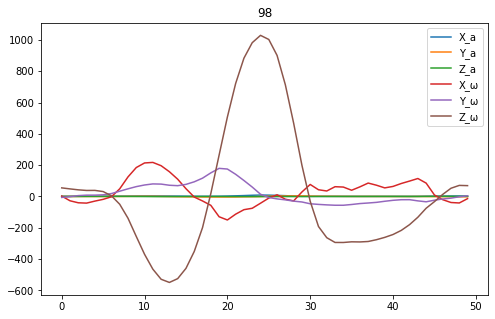

<Figure size 432x288 with 0 Axes>

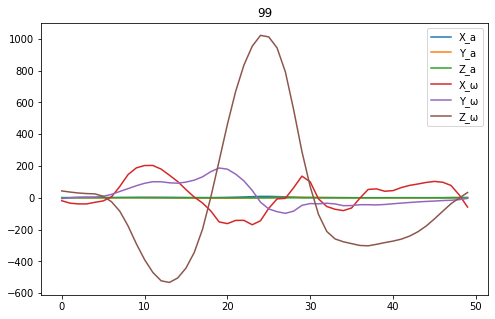

<Figure size 432x288 with 0 Axes>

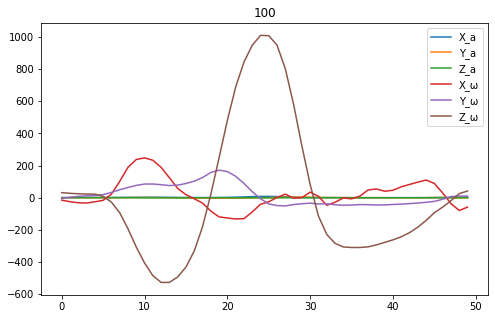

<Figure size 432x288 with 0 Axes>

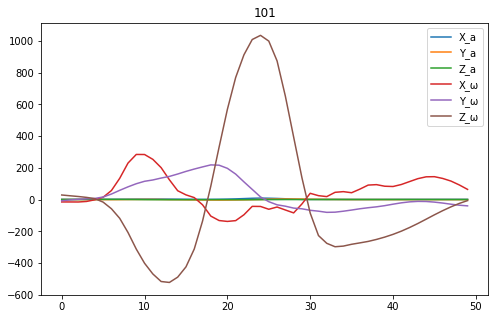

<Figure size 432x288 with 0 Axes>

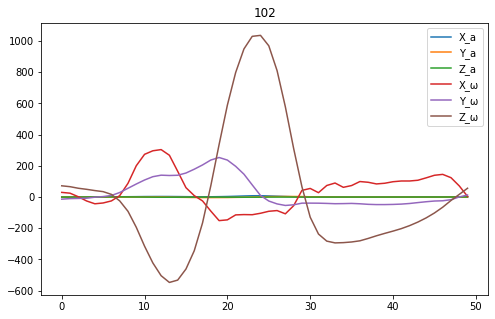

<Figure size 432x288 with 0 Axes>

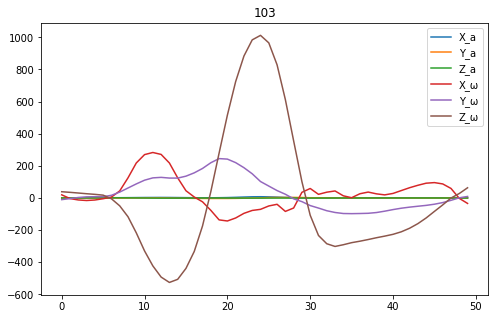

<Figure size 432x288 with 0 Axes>

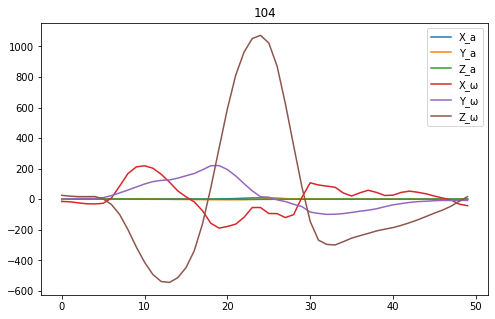

<Figure size 432x288 with 0 Axes>

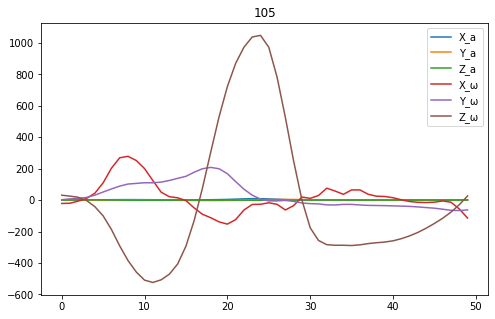

<Figure size 432x288 with 0 Axes>

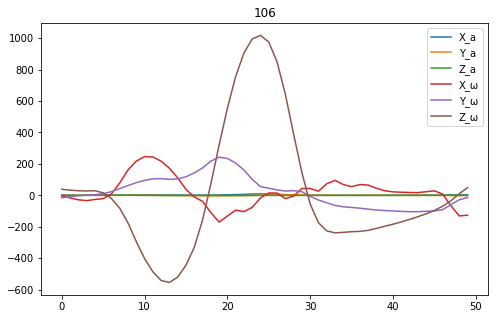

<Figure size 432x288 with 0 Axes>

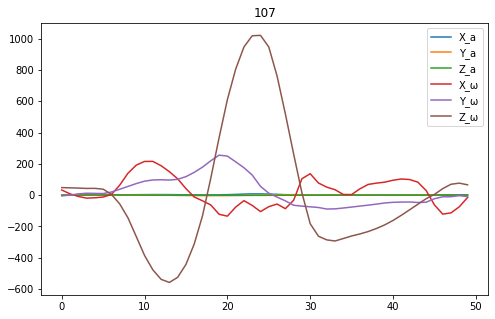

<Figure size 432x288 with 0 Axes>

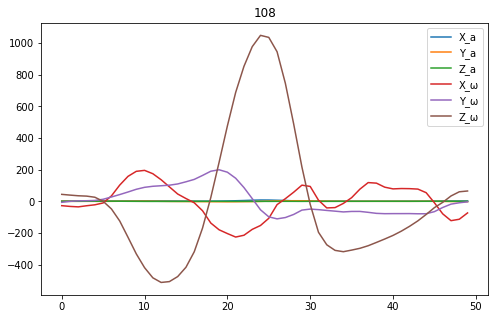

<Figure size 432x288 with 0 Axes>

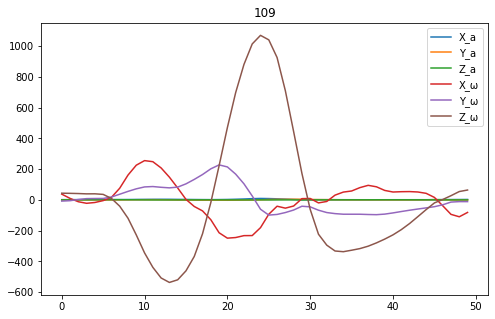

<Figure size 432x288 with 0 Axes>

In [58]:
for i in range(len(df)):
    df[i].plot(figsize=(8,5),title=i)
    plt.show()
    plt.clf()

In [59]:
df_save = pd.DataFrame()
for i in range(0,len(df)):
    df_save = df_save.append(df[i])

In [60]:
df_save

X_a       Y_a       Z_a         X_ω        Y_ω        Z_ω
0   1.333008  0.151855  0.080859  -22.207318 -16.926830  60.768295
1   1.387500  0.168555  0.124902  -47.609758  -6.780488  53.951221
2   1.468164  0.113574  0.204102  -53.963417   3.231708  46.256099
3   1.570020  0.005371  0.363086  -48.987807   7.987805  38.719513
4   1.596387 -0.164063  0.564258  -26.548782   9.817073  30.585367
..       ...       ...       ...         ...        ...        ...
45  1.343555  1.458105  0.060254   15.707318 -44.500001 -19.865854
46  1.643359  0.691309 -0.128027  -38.292684 -32.060976   2.134147
47  1.834863 -0.202832 -0.074414  -94.341468 -14.536585  27.024391
48  2.104590 -0.621191 -0.308105 -110.036591 -11.500000  53.975611
49  2.449219 -0.965332 -0.368555  -81.792688 -11.573171  63.817075

[5500 rows x 6 columns]

In [61]:
df_save.to_excel('bcsn_fq_4_10_cut.xlsx')